<a href="https://colab.research.google.com/github/lupantaleon/Entregas-/blob/main/Vecinos_Cercanos_KNN_Luciana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files

#EJERCICIO 1 - Clientes Crédito

In [ ]:
uploaded = files.upload()

Saving Clientes_Credito.csv to Clientes_Credito (1).csv


In [ ]:
df_ej1 = pd.read_csv("Clientes_Credito.csv", sep=';', encoding='latin-1') #sin el encoding tira error al leer el archivo
df_ej1.head()

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Buen Pagador
0,1,2,4,3,1,4,1
1,2,2,3,2,1,4,1
2,3,4,1,1,4,2,2
3,4,1,4,3,1,4,1
4,5,3,3,1,3,2,2


##Análisis Explotario de Datos

In [ ]:
df_ej1.describe()

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Buen Pagador
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,2.400000,2.733333,2.533333,2.133333,2.466667,1.400000
std,4.472136,1.121224,1.032796,0.990430,0.990430,1.245946,0.507093
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.500000,1.500000,2.000000,2.000000,1.000000,1.500000,1.000000
50%,8.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000
75%,11.500000,3.000000,3.500000,3.000000,3.000000,4.000000,2.000000
max,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000


In [ ]:
df_ej1.shape # tupla que contiene dos valores: el número de filas y el número de columnas presentes en el DataFrame

(15, 7)

In [ ]:
df_ej1.isnull().sum() #para ver datos nulos y sumarlos

Cliente                0
Monto Credito          0
Ingreso Neto           0
Coeficiente Credito    0
Monto Cuota            0
Grado Académico        0
Buen Pagador           0
dtype: int64

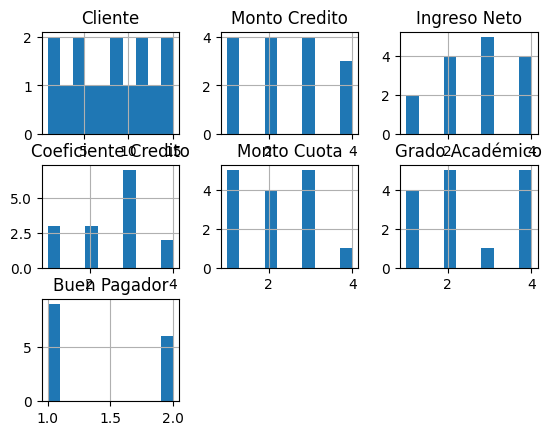

In [ ]:
df_ej1.hist()
plt.show()
#5 atributos y 1 clase (paga o no paga) para cada cliente (instancia)

##Preparamos el dataset

In [ ]:
from sklearn.model_selection import train_test_split #dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler #se utiliza para realizar la escala de características (feature scaling) en los datos, transformando las características para que estén dentro de un rango específico (por lo general, entre 0 y 1).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report #se utiliza para generar un informe detallado que muestra métricas de evaluación del rendimiento de un clasificador, como precisión, recuperación
from sklearn.metrics import confusion_matrix #se utiliza para crear una matriz de confusión que muestra la relación entre las predicciones de un modelo y las etiquetas de clase verdaderas. Es útil para evaluar la precisión del modelo y entender los errores de clasificación.
from sklearn.metrics import ConfusionMatrixDisplay #se utiliza para visualizar una matriz de confusión de una manera más legible y gráfica.

 Se seleccionan características específicas y etiquetas de clase del DataFrame original, se dividen en conjuntos de entrenamiento y prueba, se realiza la escala de características utilizando MinMaxScaler y se transforman los datos de entrenamiento y prueba en función de la escala aprendida. Esto es comúnmente realizado para preparar los datos antes de entrenar un modelo de aprendizaje automático.

In [ ]:
X = df_ej1[['Monto Credito','Ingreso Neto','Coeficiente Credito','Monto Cuota','Grado Académico']].values
y = df_ej1['Buen Pagador'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##a) Probar con K = 3

In [ ]:
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.75


A) explicación : En resumen, se crea un clasificador K-NN con un número específico de vecinos, se entrena el modelo utilizando los datos de entrenamiento y se evalúa la precisión tanto en el conjunto de entrenamiento como en el conjunto de prueba. La precisión proporciona una medida de qué tan bien se está desempeñando el modelo en la clasificación de los datos de prueba.

## b) Probar con K = 0

In [ ]:
n_neighbors = 0
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

InvalidParameterError: ignored

## c) Probar con K = 5

In [ ]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.75


## d) Matriz de Confusión para opción "a"

 Se utiliza el objeto ConfusionMatrixDisplay para mostrar la matriz de confusión utilizando la matriz de confusión cm generada previamente. La opción display_labels se utiliza para asignar etiquetas legibles a las clases del clasificador K-NN, que en este caso son "buen pagador" y "mal pagador".

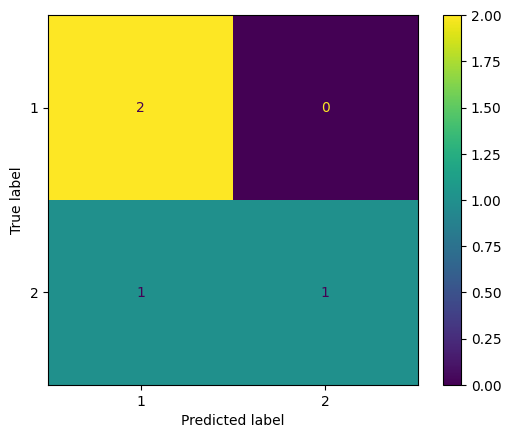

In [ ]:
'''
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)'''
plt.rcdefaults()
pred = knn.predict(X_test)
cm=confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=knn.classes_).plot()

#1 es buen pagador ; 2 es mal pagador

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## e) Matriz de Confusión para opción "b" > NO SE PUEDE REALIZAR

## f) Matriz de Confusión para opción "C" > IDEM "a"

##g) ¿Qué precisión se obtiene para cada opción? ¿Qué conclusiones sacás al respecto?

*   Para K=3 la precisión es de 75%
*   Para K=0 no se puede calcular precisión pues no se genera modelo al no tener ningún vecino
*   Para K=5 la precisión es de 75%
*   Conclusión = la cantidad de vecinos no tiene relación proporcional con la precisión del modelo obtenido, salvo que sea cero

## h) Graficar resultado para cada opción ; Mejor valor "K" (adicional al ejercicio)

Se itera a través de los valores de k en el rango de 1 a 11 y se entrena y evalúa el modelo K-NN para cada valor de k. La precisión se guarda en la lista scores.

Después, se crea un gráfico de dispersión con plt.scatter para mostrar los resultados. Se establece el eje x como los valores de k y el eje y como las precisiones. Finalmente, se ajustan los marcadores de las etiquetas del eje x con plt.xticks para que coincidan con los valores en el rango de k. El gráfico se muestra utilizando plt.show().

([<matplotlib.axis.XTick at 0x7fdf59565480>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

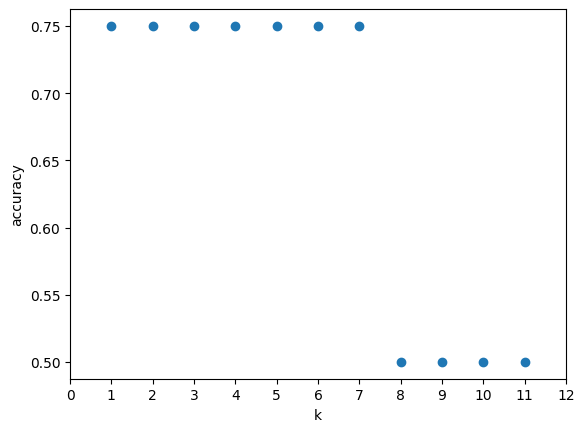

In [ ]:
k_range = range(1, 12) #12 valor máx de K porque el modelo necesita 3 vecinos y el "n" total es 15
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])

## i) Predicciones (adicional al ejercicio)

En este código, se crea una instancia de KNeighborsClassifier con el número de vecinos definido anteriormente (n_neighbors). Se utiliza 'distance' como valor para el parámetro weights, lo que indica que se aplicará una ponderación inversamente proporcional a la distancia en los vecinos más cercanos.

Luego, el clasificador se entrena con los datos (X y y). Finalmente, se realizan las predicciones utilizando el método predict del clasificador. Se pasan diferentes conjuntos de características (en este caso, representados por listas de valores) y se imprime la predicción correspondiente.

Cada predicción se imprime como una etiqueta numérica. Si la etiqueta numérica 1 se refiere a un buen pagador y la etiqueta numérica 2 se refiere a un no pagador, puedes interpretar los resultados en base a estas etiquetas.

In [ ]:
#se crea instancia para Neighbours Classifier y la entrenamos con los datos
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
print(clf.predict([[4, 4, 2, 2, 3]])) #pagador
print(clf.predict([[1, 4, 3, 2, 4]])) #pagador
print(clf.predict([[3, 2, 3, 4, 2]])) #no pagador
print(clf.predict([[4, 1, 3, 3, 2]])) #no pagador
print(clf.predict([[3, 4, 3, 1, 3]])) #pagador
print(clf.predict([[1, 3, 2, 2, 4]])) #pagador
print(clf.predict([[3, 3, 3, 3, 1]])) #no pagador

[1]
[1]
[2]
[2]
[1]
[1]
[2]


In [ ]:
print(clf.predict_proba([[4, 4, 2, 2, 3]])) #para las coordenadas dadas hay 80,39% probabilidades que sea buen pagador
print(clf.predict_proba([[1, 4, 3, 2, 4]]))
print(clf.predict_proba([[3, 2, 3, 4, 2]]))
print(clf.predict_proba([[4, 1, 3, 3, 2]]))
print(clf.predict_proba([[3, 4, 3, 1, 3]]))
print(clf.predict_proba([[1, 3, 2, 2, 4]]))
print(clf.predict_proba([[3, 3, 3, 3, 1]]))

[[0.80389607 0.19610393]]
[[1. 0.]]
[[0. 1.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]


#EJERCICIO 2 - Iris

In [ ]:
#Importamos al método
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Importamos el conjunto de datos
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
#Guardamos el conjunto de datos Iris en una variable iris
iris = load_iris()

In [ ]:
#Dividimos nuestros datos en "conjunto de entrenamiento y de prueba"
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [ ]:
#Declaramos al método
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Ajustamos a al método
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# El porcentaje de acertamiento del método
porcentaje_acercamiento = knn.score(x_test, y_test)

In [ ]:
#Imprimo el Resultado en Pantalla
print ("Porcentaje de Acercamiento es:",porcentaje_acercamiento)

Porcentaje de Acercamiento es: 0.9210526315789473


##*Interpreto que en base a los datos con los que trabajamos, el modelo utilizado y cantidad de vecinos seeccionados el modelo tiene una certeza de 92,11% para predecir la clasificación de los pétalos*